In [13]:
import gbeflow
import os
import bebi103
import bokeh.io
bokeh.io.output_notebook()
import matplotlib.pyplot as plt

Loading BokehJS ...

In [22]:
import altair as alt

In [30]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [14]:
from imp import reload

In [86]:
reload(gbeflow)

<module 'gbeflow' from '/Users/morganschwartz/Code/germband-extension/gbeflow/__init__.py'>

# Data import and setup 

In [2]:
name = '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt'

In [87]:
%%time
vf = gbeflow.VectorField(name)

CPU times: user 22.3 s, sys: 2.66 s, total: 24.9 s
Wall time: 18.1 s


In [75]:
vf.add_image_data(os.path.join('../data',vf.name+'.tif'))

In [5]:
p = vf.pick_start_points()

INFO:bokeh.server.server:Starting Bokeh server version 0.13.0 (running on Tornado 5.1)


In [88]:
vf.save_start_points(p)

In [8]:
vf.starts

,x,y
0,993.779647,485.008214
1,1009.791466,522.839286
2,1026.756210,484.326250
3,1017.106170,444.545000


# Test a variety of $\Delta t$ values

In [48]:
Ldt = [1,30,60,120,180]

In [90]:
for dt in Ldt:
    vf.calc_track_set(vf.starts,dt,name='dt '+str(dt),timer=False)

In [91]:
vf.tracks.head()

,x,y,t,track,name
0,993.779647,485.008214,0,0,dt 1
1,993.779647,485.008214,1,0,dt 1
2,993.953022,484.705986,2,0,dt 1
3,994.177133,484.844247,3,0,dt 1
4,994.136528,484.740067,4,0,dt 1


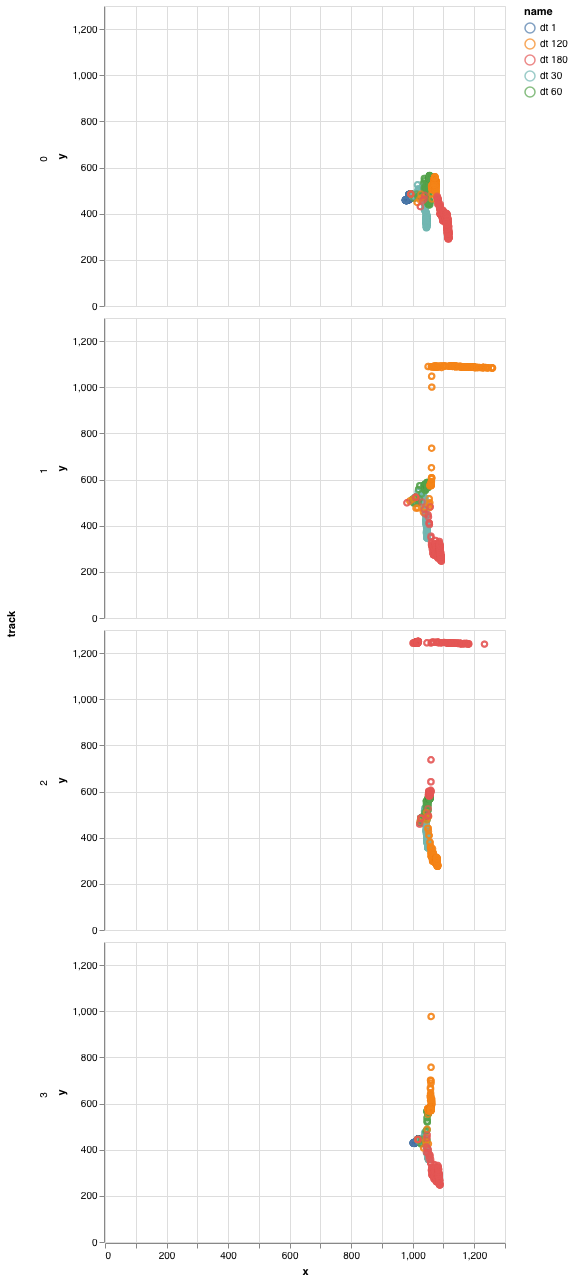

In [93]:
alt.Chart(vf.tracks
         ).mark_point(
        ).encode(
            x='x:Q',
            y='y:Q',
            row='track:N',
            color='name:N'
        )

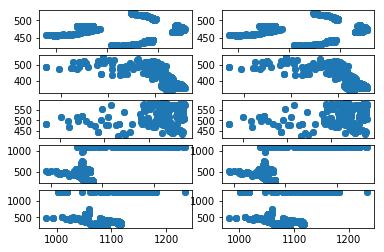

In [92]:
fig,ax = plt.subplots(len(Ldt),2)
for j,dt in enumerate(Ldt):
#     ax[j,0].imshow(vf.img[0],cmap='Greys')
#     ax[j,1].imshow(vf.img[-1],cmap='Greys')
    
    for i in [0,1]:
        df = vf.tracks[vf.tracks['name'] == 'dt '+str(dt)]
        ax[j,i].scatter(df.x,df.y)

In [ ]:
fig,ax = plt.subplots